## __XGBoost__
- XGBoost stands for __eXtreme Gradient Boosting__. 
- It is a supervised machine learning algorithm that can be used for regression or classification problems.
- It is a gradient boosting algorithm that uses decision trees as its weak learners.
- It's implementation was specifically engineered for optimal performance and speed.
- It works best on large and complicated data. 
- XGB is sensitive to outliers.

__Basic Intuition__
- We calculate similarity score and gain to determine how to split data and we prun the tree by calculating difference between gain and user defined gamma. If the difference is positive then we will not remove node whereas if negative we will cut remove the node.
- If we prun then we substract gamma from next information gain.
- Then we calculate output values and the final prediction based on output values and learning rate.

__Significance of Lamda__
- Lambda is a regularization parameter, when lambda is greater than zero it results in more pruning by shrinking similarity scores and smaller output values for leaves.

__XGB handling missing values:__ 
- XGB is internally designed to handle missing values. It tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
- During training, XGB decides whether the missing values should fall into the right node or left node. __gblinear__ booster treats missing values as zeros. 
- On the other hand, SVM does not perform well with the missing data and it is always a better option to impute the missing values before running SVM. That's why XGBoost is better than SVM.
- Just like random forest and decision trees, XGB automatically evaluate feature importance from a trained predictive model. 
- __LightGBM__ is significantly faster than XGBoost but delivers almost equivalent performance.

## __XGB Regression__
- Assign initial prediction for first decision leaf as average of target column.
- Depending upon the predictions of first model calculate residuals for each data point.
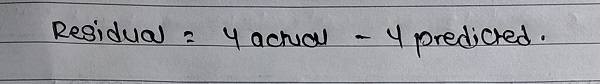


- Calculate similarity/quality score for root node, considering all residuals.
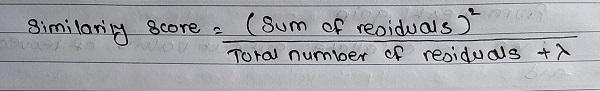

- λ(lambda) is a regularization parameter to prevent overfitting of training data. It is intended to reduce the prediction sensitivity of individual observation.
- By considering each value as a thresh value calculate information gain for each value as threshold.
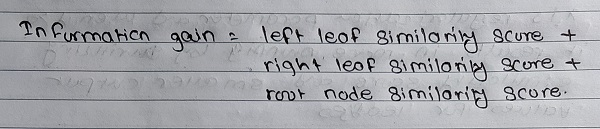

- Select a decision/branch node having maximum information gain.
- Repeat the same steps to find out further splitting nodes and plot the entire tree, based on the information gain.
- In XGBoost regression the max depth allowed is 6.
- After ploting the entire tree pruning of tree is done. Pruning is nothing but cutting down or removing some of the decision nodes or branch nodes from the decision tree.
- To find out which branch node should be removed we calculate the difference between information gain and the gamma value.
- Gamma value is nothing but the user defined tree complexity control parameter. By default value of gamma is '0'.
- A thing to remember is that even if the value of gamma is '0' it will not turn off the pruning rocess unlike when λ is set to zero; we will turn off the regualrization.
- If the difference between gain and gamma is negative then we will remove the branch node but if the difference is poistive then we will not remove branch node.
- Now that we got our first final decision tree after pruning, we calculate the output values for each node.
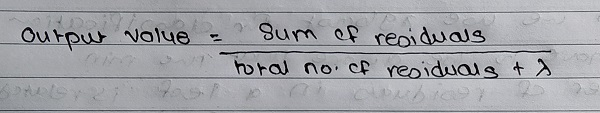

- Based upon the decision leaf prediction, learning rate and output value we will calculate the final predictions of each data point for second model.
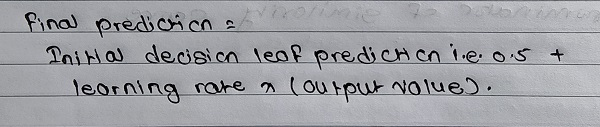
- In XGBoost learning rate is reffred as eta which has by default value as 0.3
- In this way we will keep building models or decision trees until the residuals become comparatively small or have reached max number of decision trees.
- Basically, we take smaller steps towards right decision by minimizing the residual.

## __XGB Classification__
- Assign initial probability prediction for first decision leaf as 0.5 (by default it is 0.5)
- Depending upon the probability predictions of first model calculate residuals for each data point.
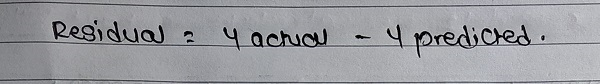

- Calculate similarity/quality score for root node, considering all residuals.
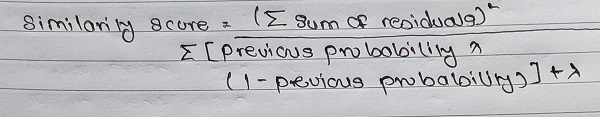`

- In XGBclassification we take previous probabilty as decision leaf probability prediction that is 0.5.
- λ(lambda) is a regularization parameter to prevent overfitting of training data. It is intended to reduce the prediction sensitivity of individual observation.
- By considering each value as a thresh value calculate information gain for each value as threshold.
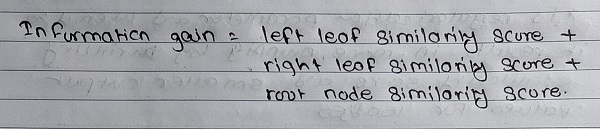

- Select a decision/branch node having maximum information gain.
- Repeat the same steps to find out further splitting nodes and plot the entire tree, based on the information gain.
- XGBosst classifier has threshold for minimum value of residual in each leaf. The minimum value for residuals in each leaf is determined by calculating cover.
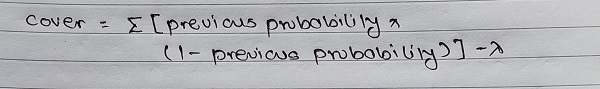

- In XGBoost classifier cover depends up on previously predicted probabilities of each residual in leaf. 
- In XGBoost regression cover is eual to number of residuals in leaf. By default value of cover is 1, that's why in XGBoost regression cover has no impact on how we grow the tree but XGBoost classifier does.
- If we use by default value of cover which is 1 we will leftwith only root node and XGBoost requires trees to be larger than root. That's why we perform hyper parameter tunning of min_child_weight parameter.
- After ploting the entire tree pruning of tree is done. Pruning is nothing but cutting down or removing some of the decision nodes or branch nodes from the decision tree.
- To find out which branch node should be removed we calculate the difference between information gain and the gamma value.
- Gamma value is nothing but the user defined tree complexity control parameter. By default value of gamma is '0'.
- A thing to remember is that even if the value of gamma is '0' it will not turn off the pruning rocess unlike when λ is set to zero; we will turn off the regualrization.
- If the difference between gain and gamma is negative then we will remove the branch node but if the difference is poistive then we will not remove branch node.
- Now that we got our first final decision tree after pruning, we calculate the output values for each node.
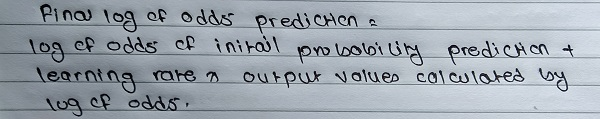

- So as to calculate output values for each leaf we need to convert probility prediction of decision leaf to log of odds first to use it. 
- Based upon the log of odds of decision leaf probabilty prediction, learning rate and output values we will calculate the final log of odds predictions of each data point for second model.
- In XGBoost learning rate is reffred as eta which has by default value as 0.3
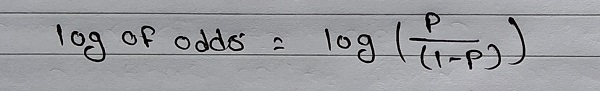

- So as to convert that final log of odds predictions into probaility we need to apply logistic function. That's how we calculate the final probability predictions for second model/decision tree.
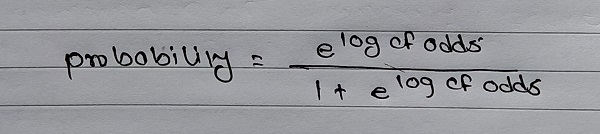
- In this way we will keep building models or decision trees until the residuals become comparatively small or have reached max number of decision trees.
- Basically, we take smaller steps towards right decision by minimizing the residual.

__You may wonder why are we adding log of odds of initial decision leaf prediction because anyhow it is going to be 0 for 0.5__
- If we use default value 0.5 initial decision leaf prediction log of odds will be 0, however we can change the initial prediction to any probability and any value other than 0.5
- For example, if 75% of the observation in the training data said to be positive or 1 then we may set initial decision leaf prediction as 0.75

__Hyperparameters of XGB__
- __`booster:`__ gbtree, gblinear, dart
  - The default option is gbtree
  - dart: uses dropout techniques to avoid overfitting
  - gblinear uses generalized linear regression instead of decision trees
- __`n_estimators:`__ number of decisio trees to generate by default it is 100
- __`max_depth `__ maximum depth of the tree
- __`learning_rate`__
- __`reg_alpha`__ L1 regularization
- __`reg_ lambda`__ L2 regularization
- __`gamma:`__ tree complexity control parameter
- __`min_child_weight:`__ cover

- __`subsample`__ random samples to select
- __`colsample_bytree`__ random number of samples per tree

__**Note__
- If you have a imbalanced data use AUC score to evaluate the performance of the model

In [2]:
from xgboost import XGBClassifier, XGBRegressor